# Titanic Dataset Project 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/450px-RMS_Titanic_3.jpg" width="300">

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although where was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

For this project, I have worked with the [Titanic dataset](https://www.kaggle.com/c/titanic) on Kaggle.com to analyze the passenger information from the training set, and analyze what factors may affect a passenger's chance for survival. 



# Stage I: Data Exploration


(1) Download the training data from https://www.kaggle.com/c/titanic/data as a CSV file.

(2) Load the training dataset as a Pandas DataFrame. 

In [ ]:
import pandas as pd
df = pd.read_csv(r'train.csv')
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


(3) Obtain basic information of variables. For each variable, find out:
1. What does this variable represent
2. The meaning of values
3. Numerical summary
4. Graphical distributions of values


In [ ]:
df.shape

(891, 12)

In [ ]:
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.loc[1]
df.info


<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

(4) Data Cleaning

Discard all passengers with incomplete information may significantly reduce the number of data example. Please handle the missing value problem in the following way:
1. Remove all columns that contain more than 5% missing values.
2. After Step 1, remove any row that has missing values.



In [ ]:
limit = len(df) * .50
df.dropna(how='any', axis=1, thresh=limit)
df.dropna(how='any',  axis=0)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


(5) Prediction Power
A good model should only include variables that are indeed related to the task. Use correlation coefficients and scatter plots to decide which variables have strong relationship to passengers’ survival, and which don’t. 


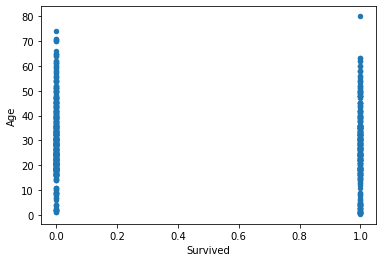

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [ ]:
import matplotlib.pyplot as plot
df_plot = pd.DataFrame(data=df, columns=['Age','Survived'])
df_plot.plot.scatter(y='Age', x='Survived')
plot.show()
df.corr()


(6) (optional) You may think that the name feature is irrelevant. However, a closer look at the names will show that some passengers have rare titles such as Dr., Mme, or Master., which indicates their high social status. Please create a column to indicate whether a passenger has a rare title.

In [ ]:
def func(x):
    if 'Dr.' in x:
        return 'Rare'
    elif 'Mme' in x:
        return 'Rare'
    elif 'Master.' in x:
        return 'Rare'
    else:
        return 'NA'
df['Rare_Title'] = df['Name'].apply(func)
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Rare_Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NA
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NA
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NA
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NA
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,NA
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,NA
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NA
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,NA


## Stage II: Model Construction

(1) Converting Categorical Features

1. Sex in the original dataset is categorial, and thus cannot be directly fed into Machine Learning models. Please convert the categories into 0’s and 1’s.
2. Embarked is also categorical. However, it is not ideal to simply convert the three categories into 0, 1, and 2, since it creates a bias by imposing an order to the values. Instead, we can add an indicator variable (also known as a dummy variable) for each category separately. Please replace the Embarked variable with three variables – Embarked_S, Embarked_C, and Embarked_Q – to indicate the place a passenger boarded the ship. For example, if a passenger boarded from Southamptons, Embarked_S should be set to 1, and Embarked_C and Embarked_Q should be zero. ([pandas.get_dummies()](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) can help you with this)


In [ ]:
import numpy as np
df['Sex'] = np.where(df['Sex'] == 'female',1,0)
pd.get_dummies(df['Embarked'], prefix="Embarked_")


,Embarked__C,Embarked__Q,Embarked__S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


(2) Feature Scaling

Machine learning models usually work best on datasets whose variables have similar ranges. Please scale each variable so that it has zero mean and unit variance (sklearn.preprocessing.StandardScaler() can help you with this).

In [ ]:
import sklearn
min_max_scaler = sklearn.preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_std


(3) Extract Validation set

Because the test dataset from the website has no information on survival, it cannot be used to evaluate the performance of the model. As a result, we need to further split the data in train.csv into training set (80%) and validation set (20%). We will use training set to build the models, and use validation set to evaluate them. (`sklearn.model_selection.train_test_split()` can help you with this)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)


(4) Feature Engineering

Previously we noticed that some passengers’ names have rare titles, which may indicate their unusual social status. Extracting a new feature from existing data is called feature engineering. Another interesting thing you may observed is that some passenger got on board for free! This could also be a potential indicator of the social status of the passenger. Please create an indicator variable on whether a person paid for the ticket.

In [ ]:
def func(x):
    if x=='Rare':
        return 'Paid'
    else:
        return 'Not Paid'
df['status'] = df['Rare_Title'].apply(func)

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Rare_Title,status
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,NA,Not Paid
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,NA,Not Paid
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NA,Not Paid
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,NA,Not Paid
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,NA,Not Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S,NA,Not Paid
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S,NA,Not Paid
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S,NA,Not Paid
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C,NA,Not Paid


(5) Building Models

So far, we have learned five models: linear regression, polynomial regression, logistic regression, k-nearest neighbors method, and linear support vector machine. Choose at least two models that are suitable for this problem and use corresponding sklearn classes to fit the data. Note that each model class has several parameters, you are welcome to change the default parameter values and try to improve the performance of the model.


In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler

x= df.iloc[:, [4,5]].values  
y= df.loc[:, 1].value
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0) 
std_x= StandardScaler()    
x_train= std_x.fit_transform(x_train)    
x_test= std_x.transform(x_test)  
model1= LogisticRegression(random_state=0)  
model1.fit(x_train, y_train) 

model2= LogisticRegression(random_state=0)  
model2.fit(x_train, y_train)


## Stage III: Model Selection and Interpretation

(1) Model Selection. 

For each model you have trained, perform the following evaluations on the validation set:
1. cross validation
2. confusion matrix
3. precision, and recall 

What is the best model?

In [ ]:
Scores_1 = cross_val_score(model1, X_train, y_train, scoring='r2', cv=5)
Scores_2 

scores_2 = cross_val_score(model2, X_train, y_train, scoring='r2', cv=5)
scores_2 


(2) Model Interpretation.

Based on the model that you have selected, can you identify a few key variables that are important in predicting the survival of the passengers? Try to find out which characteristics can improve passengers’ chance of survival.


In [ ]:
model1 = LogisticRegression()
model1.fit(df[['Age', 'Survived Status']], df['target'])


points_x1 = points_x1.reshape([100*100, 1])
points_x2 = points_x2.reshape([100*100, 1]) 
points = np.hstack([points_x1, points_x2])

predictions = model1.predict(points)

plt.scatter(points_x1, points_x2, c=predictions, alpha=0.03)

plt.scatter(iris_df['Age'], iris_df['Survival Status'], c=df['target'])
plt.colorbar()

predictions_for_confusion_matrix = model1.predict(iris_df[['Age', 'Survival Status)']])
confusion_matrix(df['target'], predictions_for_confusion_matrix